In [18]:
from facetorch import FaceAnalyzer
from facetorch.analyzer.utilizer import LandmarkDrawerTorch
from omegaconf import OmegaConf
from torch.nn.functional import cosine_similarity
from typing import Dict
import operator
import torchvision
import torch
import matplotlib.pyplot as plt
import numpy as np

## Configure

In [19]:
path_img_input="../Dataset/Labeled_Faces_in_the_Wild/lfw-deepfunneled/lfw-deepfunneled/Abdullah_Gul/Abdullah_Gul_0015.jpg"
path_img_output="test_output.jpg"
path_config="../Pre-processing/gpu.config.yml"


cfg = OmegaConf.load(path_config)

## Startup

In [20]:
# initialize
analyzer = FaceAnalyzer(cfg.analyzer)


{"asctime": "2024-10-04 14:10:15,831", "levelname": "INFO", "message": "Initializing FaceAnalyzer"}
{"asctime": "2024-10-04 14:10:15,831", "levelname": "INFO", "message": "Initializing BaseReader"}
{"asctime": "2024-10-04 14:10:15,842", "levelname": "INFO", "message": "Initializing FaceDetector"}
{"asctime": "2024-10-04 14:10:16,235", "levelname": "INFO", "message": "Initializing FaceUnifier"}
{"asctime": "2024-10-04 14:10:16,244", "levelname": "INFO", "message": "Initializing FacePredictor objects"}
{"asctime": "2024-10-04 14:10:16,245", "levelname": "INFO", "message": "Initializing FacePredictor embed"}
{"asctime": "2024-10-04 14:10:16,562", "levelname": "INFO", "message": "Initializing FacePredictor verify"}
{"asctime": "2024-10-04 14:10:18,737", "levelname": "INFO", "message": "Initializing FacePredictor au"}
{"asctime": "2024-10-04 14:10:19,354", "levelname": "INFO", "message": "Initializing FacePredictor va"}
{"asctime": "2024-10-04 14:10:19,405", "levelname": "INFO", "message": 

## Inference

In [21]:
response = analyzer.run(
        path_image=path_img_input,
        batch_size=cfg.batch_size,
        fix_img_size=cfg.fix_img_size,
        return_img_data=cfg.return_img_data,
        include_tensors=cfg.include_tensors,
        path_output=path_img_output,
    )


{"asctime": "2024-10-04 14:10:19,701", "levelname": "INFO", "message": "Running FaceAnalyzer"}
{"asctime": "2024-10-04 14:10:19,701", "levelname": "INFO", "message": "Reading image", "input": "../Dataset/Labeled_Faces_in_the_Wild/lfw-deepfunneled/lfw-deepfunneled/Abdullah_Gul/Abdullah_Gul_0015.jpg"}
{"asctime": "2024-10-04 14:10:19,718", "levelname": "INFO", "message": "Detecting faces"}
{"asctime": "2024-10-04 14:10:20,061", "levelname": "INFO", "message": "Number of faces: 1"}
{"asctime": "2024-10-04 14:10:20,061", "levelname": "INFO", "message": "Unifying faces"}
{"asctime": "2024-10-04 14:10:20,075", "levelname": "INFO", "message": "Predicting facial features"}
{"asctime": "2024-10-04 14:10:20,075", "levelname": "INFO", "message": "Running FacePredictor: embed"}
{"asctime": "2024-10-04 14:10:20,148", "levelname": "INFO", "message": "Running FacePredictor: verify"}
{"asctime": "2024-10-04 14:10:29,294", "levelname": "INFO", "message": "Running FacePredictor: au"}
{"asctime": "2024-1

In [22]:
response.faces[0].tensor.shape

torch.Size([3, 380, 380])

## Output image

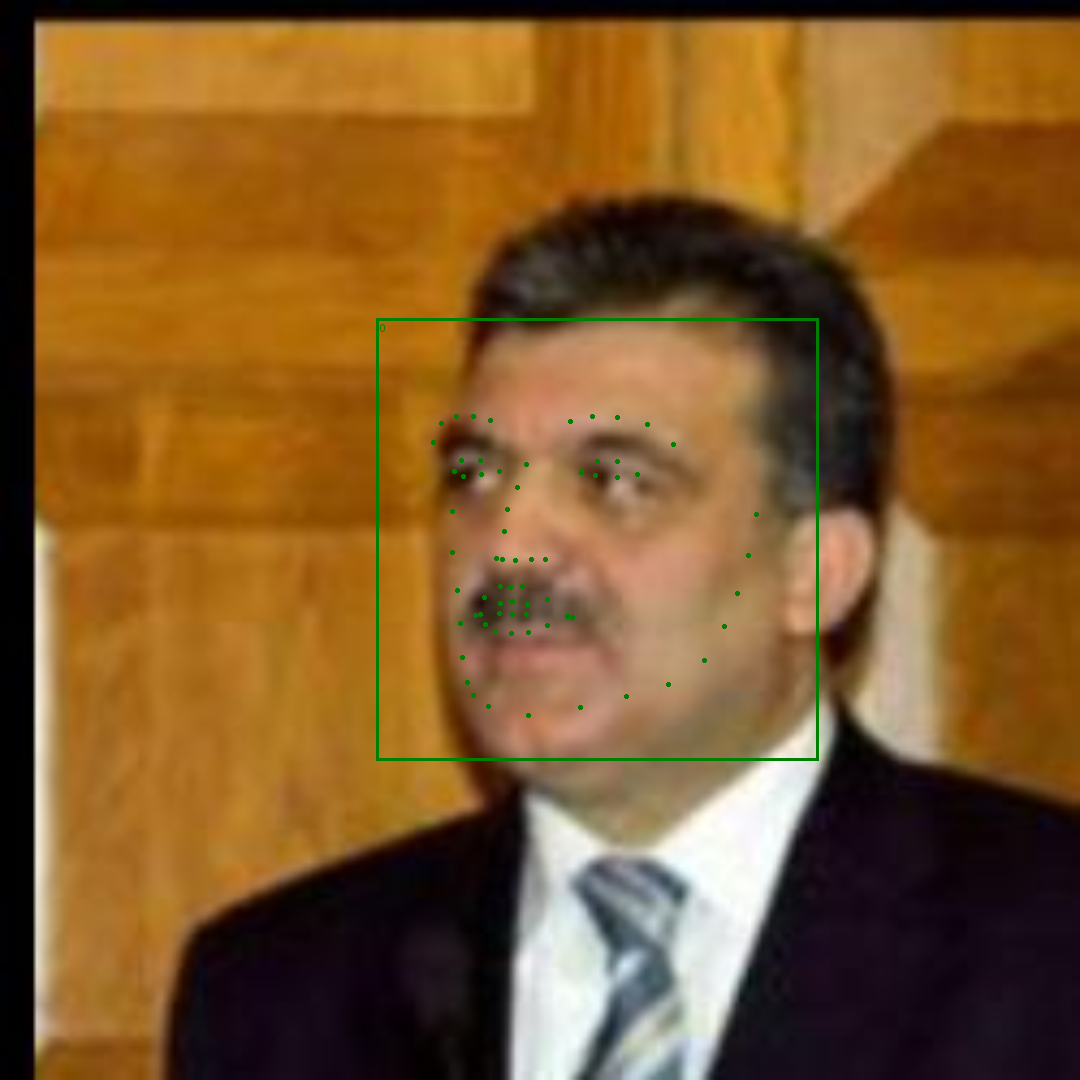

In [23]:
pil_image = torchvision.transforms.functional.to_pil_image(response.img)
pil_image

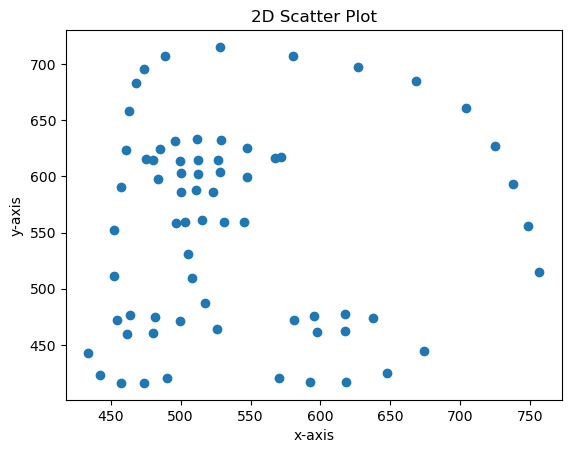

In [35]:


pts = [face.preds["align"].other["lmk3d"].cpu() for face in response.faces]


# data = normalize(pts[0])
data = pts[0]

norm = np.linalg.norm(data)  # Calculate the L2 norm of the data
normalized_data = data / norm

# Extract the first two columns for 2D scatter plot
x = data[0,:]  # First column (x)
y = data[1,:]  # Second column (y)
z = data[2,:]  # Third column (z)

# Create the 2D scatter plot
plt.scatter(x, y)
# print(len(z))

# Add labels and title
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('2D Scatter Plot')

# Display the plot
plt.show()


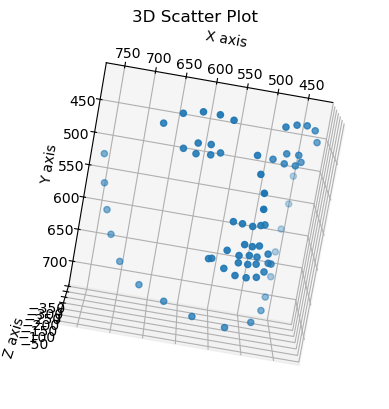

In [37]:
data = pts[0]

# Extract the three columns for 3D scatter plot
x = data[0,:]  # First column (x)
y = data[1,:]  # Second column (y)
z = data[2,:]  # Third column (z)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Create the 3D scatter plot
ax.scatter(x, y, z)

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('3D Scatter Plot')

# Display the plot
ax.view_init(elev=100, azim=100)
plt.show()

## Rotation

In [26]:
print(response.faces[0].preds["align"].other["pose"])


{'angles': [22.22066922971084, 9.626225756546859, 2.7055881865797984],
 'translation': tensor([618.8181, 524.6133, -87.0208], device='cuda:0', dtype=torch.float64)}

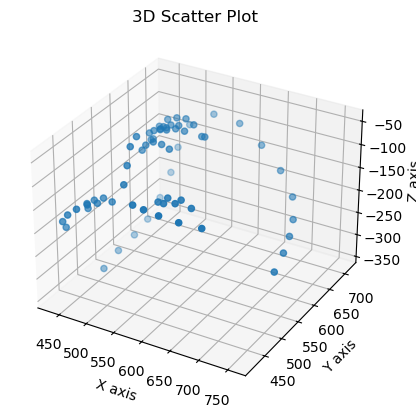

In [36]:
data = pts[0]

# Extract the three columns for 3D scatter plot
x = data[0,:]  # First column (x)
y = data[1,:]  # Second column (y)
z = data[2,:]  # Third column (z)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
ax.scatter(x, y, z)

# Add labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('3D Scatter Plot')

plt.show()

## FFT

[[-3.29022702 -3.06097071 -3.80943365 -3.46136487 -4.16477154 -2.93947918
  -3.15392199 -3.7334489  -2.96962099 -5.70747701 -3.65456163 -4.97913581
  -2.99631674 -3.23477376 -2.62391816 -3.0466049  -2.84219429 -3.17157249
  -2.95381125 -2.84608149 -3.02508296 -2.76965315 -4.44992002 -2.65555593
  -3.52475579 -2.17771401 -2.93483758 -1.45435636 -1.62866691 -1.45684928
  -1.70954025 -1.03260694 -1.16921886 -0.59124827 -1.83050137 -0.59124827
  -1.16921886 -1.03260694 -1.70954025 -1.45684928 -1.62866691 -1.45435636
  -2.93483758 -2.17771401 -3.52475579 -2.65555593 -4.44992002 -2.76965315
  -3.02508296 -2.84608149 -2.95381125 -3.17157249 -2.84219429 -3.0466049
  -2.62391816 -3.23477376 -2.99631674 -4.97913581 -3.65456163 -5.70747701
  -2.96962099 -3.7334489  -3.15392199 -2.93947918 -4.16477154 -3.46136487
  -3.80943365 -3.06097071]
 [-3.34025871 -3.3658367  -2.90396413 -3.68298805 -3.97408178 -3.33739964
  -2.82072757 -3.53997146 -3.73654133 -2.88164077 -3.73208735 -3.17388874
  -3.7711329

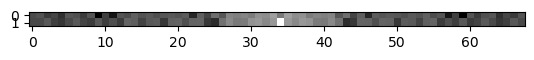

In [27]:
arr = response.faces[0].preds["align"].other["lmk3d"].cpu().numpy()

arrTwoDim = arr[:-1]

norm = np.linalg.norm(arrTwoDim)  # Calculate the L2 norm of the data
normalized_data = arrTwoDim / norm
transformed = np.fft.fft2(normalized_data)
transformedShifted = np.fft.fftshift(transformed)
logAbs = np.log(np.abs(transformedShifted))
print(logAbs)
plt.imshow(logAbs, cmap='gray')
plt.show()


[[-2.86566129 -3.71302391 -3.91898861 -3.06898234 -4.59718532 -3.17356527
  -3.77751936 -2.92323702 -2.90585139 -4.56358829 -4.08555417 -3.4164622
  -3.2118606  -2.84076911 -2.71133991 -3.29024119 -2.52062154 -4.13328616
  -3.44430688 -2.72193864 -2.54994325 -3.31739638 -3.12202342 -2.63633529
  -3.13935979 -2.86585635 -3.9286688  -1.18442081 -1.66243002 -1.69751761
  -2.36328164 -1.04323654 -0.52248064 -0.14030443  1.94836576 -1.42302395
  -2.66185214 -1.29270496 -1.52406023 -1.06301017 -1.03642266 -1.87927672
  -2.64487929 -1.94139551 -3.73403447 -2.76246499 -3.70303236 -2.24489544
  -2.32854369 -3.3601053  -2.85787847 -2.69899147 -2.96717096 -2.9059993
  -2.8412085  -2.92763801 -2.88117566 -3.83512603 -3.30039401 -4.40365065
  -2.85674404 -4.12571822 -2.99956685 -2.85638085 -3.3405976  -3.84528245
  -3.68824495 -2.81632091]
 [-5.3200844  -3.03877261 -2.55963929 -4.30851476 -3.12127981 -3.07831713
  -2.49267754 -3.40471244 -3.3864438  -2.58600153 -3.00408554 -2.82202773
  -3.84739655

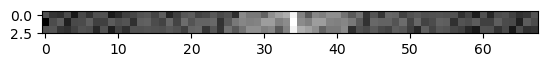

In [28]:
arr = response.faces[0].preds["align"].other["lmk3d"].cpu().numpy()

norm = np.linalg.norm(arr)  # Calculate the L2 norm of the data
normalized_data = arr / norm
transformed = np.fft.fftn(normalized_data)
transformedShifted = np.fft.fftshift(transformed)
logAbs = np.log(np.abs(transformedShifted))
print(logAbs)
plt.imshow(logAbs, cmap='gray')
plt.show()
